<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_14%EC%B0%A8%EC%8B%9C_%EC%86%8C%EC%85%9C%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import networkx as nx
from operator import itemgetter
import community

In [ ]:
with open('quakers_nodelist.csv', 'r') as nodecsv: # 노드에 관련한 데이터를 읽어온다.
    nodereader = csv.reader(nodecsv)

    nodes = [n for n in nodereader][1:]  #헤더정보를 빼고 가져온다.

node_names = [n[0] for n in nodes]  #노드의 이름만 가져온다.

with open('quakers_edgelist.csv', 'r') as edgecsv: # 노드끼리의 연결정보를 가져온다.
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:] # 튜플정보로 변형한다.

In [ ]:
edgereader , edges

(<_csv.reader at 0x2a4fcc84ee8>,
 [('George Keith', 'Robert Barclay'),
  ('George Keith', 'Benjamin Furly'),
  ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
  ('George Keith', 'Franciscus Mercurius van Helmont'),
  ('George Keith', 'William Penn'),
  ('George Keith', 'George Fox'),
  ('George Keith', 'George Whitehead'),
  ('George Keith', 'William Bradford'),
  ('James Parnel', 'Benjamin Furly'),
  ('James Parnel', 'Stephen Crisp'),
  ('Peter Collinson', 'John Bartram'),
  ('Peter Collinson', 'James Logan'),
  ('Joseph Wyeth', 'Thomas Ellwood'),
  ('Alexander Skene of Newtyle', 'Lilias Skene'),
  ('Dorcas Erbery', 'James Nayler'),
  ('William Mucklow', 'George Fox'),
  ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
  ('William Dewsbury', 'Edward Burrough'),
  ('William Dewsbury', 'George Fox'),
  ('William Dewsbury', 'John Crook'),
  ('John Audland', 'John Camm'),
  ('John Audland', 'Francis Howgill'),
  ('John Audland', 'Edward Pyott'),
  ('John Audland'

=> 강도는 모두 같음

In [ ]:
nodes

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152'],
 ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'],
 ['Thomas Salthouse',
  'Quaker preacher and writer',
  'male',
  '1630',
  '1691',
  '10010643'],
 ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'],
 ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'],
 ['Richard Claridge',
  'Quaker minister and schoolmaster',
  'male',
  '1649',
  '1723',
  '10002469'],
 ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'],
 ['Fettiplace Bellers',
  'philosophical wri

In [ ]:
node_names

['Joseph Wyeth',
 'Alexander Skene of Newtyle',
 'James Logan',
 'Dorcas Erbery',
 'Lilias Skene',
 'William Mucklow',
 'Thomas Salthouse',
 'William Dewsbury',
 'John Audland',
 'Richard Claridge',
 'William Bradford',
 'Fettiplace Bellers',
 'John Bellers',
 'Isabel Yeamans',
 'George Fox the younger',
 'George Fox',
 'John Stubbs',
 'Anne Camm',
 'John Camm',
 'Thomas Camm',
 'Katharine Evans',
 'Lydia Lancaster',
 'Samuel Clarridge',
 'Thomas Lower',
 'Gervase Benson',
 'Stephen Crisp',
 'James Claypoole',
 'Thomas Holme',
 'John Freame',
 'John Swinton',
 'William Mead',
 'Henry Pickworth',
 'John Crook',
 'Gilbert Latey',
 'Ellis Hookes',
 'Joseph Besse',
 'James Nayler',
 'Elizabeth Hooten',
 'George Whitehead',
 'John Whitehead',
 'William Crouch',
 'Benjamin Furly',
 'Silvanus Bevan',
 'Robert Rich',
 'John Whiting',
 'Christopher Taylor',
 'Thomas Lawson',
 'Richard Farnworth',
 'William Coddington',
 'Thomas Taylor',
 'Richard Vickris',
 'Robert Barclay',
 'Jane Sowle',
 'Ta

In [ ]:
nodes

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152'],
 ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'],
 ['Thomas Salthouse',
  'Quaker preacher and writer',
  'male',
  '1630',
  '1691',
  '10010643'],
 ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'],
 ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'],
 ['Richard Claridge',
  'Quaker minister and schoolmaster',
  'male',
  '1649',
  '1723',
  '10002469'],
 ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'],
 ['Fettiplace Bellers',
  'philosophical wri

In [ ]:
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [ ]:
node_names , len(node_names)

(['Joseph Wyeth',
  'Alexander Skene of Newtyle',
  'James Logan',
  'Dorcas Erbery',
  'Lilias Skene',
  'William Mucklow',
  'Thomas Salthouse',
  'William Dewsbury',
  'John Audland',
  'Richard Claridge',
  'William Bradford',
  'Fettiplace Bellers',
  'John Bellers',
  'Isabel Yeamans',
  'George Fox the younger',
  'George Fox',
  'John Stubbs',
  'Anne Camm',
  'John Camm',
  'Thomas Camm',
  'Katharine Evans',
  'Lydia Lancaster',
  'Samuel Clarridge',
  'Thomas Lower',
  'Gervase Benson',
  'Stephen Crisp',
  'James Claypoole',
  'Thomas Holme',
  'John Freame',
  'John Swinton',
  'William Mead',
  'Henry Pickworth',
  'John Crook',
  'Gilbert Latey',
  'Ellis Hookes',
  'Joseph Besse',
  'James Nayler',
  'Elizabeth Hooten',
  'George Whitehead',
  'John Whitehead',
  'William Crouch',
  'Benjamin Furly',
  'Silvanus Bevan',
  'Robert Rich',
  'John Whiting',
  'Christopher Taylor',
  'Thomas Lawson',
  'Richard Farnworth',
  'William Coddington',
  'Thomas Taylor',
  'Richa

In [ ]:
#노드와 엣지의 총 개수
print(len(node_names))
print(len(edges))

119
174


In [ ]:
G = nx.Graph() # 그래프 객체를 초기화합니다.
G.add_nodes_from(node_names) # G객체에 노드를 추가합니다.
G.add_edges_from(edges) # G객체에 엣지를 추가합니다.
print(nx.info(G)) # G객체의 정보를 출력합니다.

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


degree : 노드에서 나가는 선, 들어오는 선

In [ ]:
#지금까지의 전체소스입니다.

import csv
import networkx as nx
from operator import itemgetter
import community

# 노드리스트의 파일을 읽어옵니다.
with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

# 노드의 이름을 가져옵니다.
node_names = [n[0] for n in nodes]

# 연결선 정보(엣지정보) 가져옵니다.
with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

# 노드의 개수와 엣지의 개수(각각 119 , 174)
print(len(node_names))
print(len(edges))

G = nx.Graph() # 그래프 객체를 초기화합니다.
G.add_nodes_from(node_names) # G객체에 노드를 추가합니다.
G.add_edges_from(edges) # G객체에 엣지를 추가합니다.
print(nx.info(G)) # G객체의 정보를 출력합니다.

119
174
Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [ ]:
#노드의 속성정보를 사전형태의 타입으로 만든다.
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [ ]:
for node in nodes: # 노드의 속성정보를 세팅한다. node[0]은 노드의 이름이다.
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [ ]:
hist_sig_dict

{'Alexander Parker': 'Quaker preacher and author',
 'Alexander Skene of Newtyle': 'local politician and author',
 'Alice Curwen': 'Quaker missionary',
 'Anne Camm': 'Quaker preacher',
 'Anne Conway Viscountess Conway and Killultagh': 'philosopher',
 'Anthony Pearson': 'Quaker administrator',
 'Anthony Sharp': 'Quaker leader',
 'Benjamin Furly': 'merchant and religious writer',
 'Charles Marshall': 'Quaker preacher and apothecary',
 'Christopher Taylor': 'religious writer and schoolmaster',
 'Daniel Quare': 'maker of clocks, watches, and barometers',
 'David Barclay': 'merchant',
 'David Barclay of Ury': 'soldier and politician',
 'David Lloyd': 'lawyer and politician in America',
 'Dorcas Erbery': 'Quaker preacher',
 'Dorothy Waugh': 'Quaker preacher',
 'Edward Burrough': 'Quaker activist and writer',
 'Edward Haistwell': 'merchant',
 'Edward Pyott': 'parliamentarian army officer',
 'Elizabeth Hooten': 'Quaker preacher',
 'Elizabeth Leavens': 'Quaker missionary',
 'Ellis Hookes': 'Quak

In [ ]:
gender_dict

{'Alexander Parker': 'male',
 'Alexander Skene of Newtyle': 'male',
 'Alice Curwen': 'female',
 'Anne Camm': 'female',
 'Anne Conway Viscountess Conway and Killultagh': 'female',
 'Anthony Pearson': 'male',
 'Anthony Sharp': 'male',
 'Benjamin Furly': 'male',
 'Charles Marshall': 'male',
 'Christopher Taylor': 'male',
 'Daniel Quare': 'male',
 'David Barclay': 'male',
 'David Barclay of Ury': 'male',
 'David Lloyd': 'male',
 'Dorcas Erbery': 'female',
 'Dorothy Waugh': 'female',
 'Edward Burrough': 'male',
 'Edward Haistwell': 'male',
 'Edward Pyott': 'male',
 'Elizabeth Hooten': 'female',
 'Elizabeth Leavens': 'female',
 'Ellis Hookes': 'male',
 'Fettiplace Bellers': 'male',
 'Francis Bugg': 'male',
 'Francis Howgill': 'male',
 'Franciscus Mercurius van Helmont': 'male',
 'George Bishop': 'male',
 'George Fox': 'male',
 'George Fox the younger': 'male',
 'George Keith': 'male',
 'George Whitehead': 'male',
 'Gervase Benson': 'male',
 'Gideon Wanton': 'male',
 'Gilbert Latey': 'male',


In [ ]:
death_dict

{'Alexander Parker': '1689',
 'Alexander Skene of Newtyle': '1694',
 'Alice Curwen': '1679',
 'Anne Camm': '1705',
 'Anne Conway Viscountess Conway and Killultagh': '1679',
 'Anthony Pearson': '1666',
 'Anthony Sharp': '1707',
 'Benjamin Furly': '1714',
 'Charles Marshall': '1698',
 'Christopher Taylor': '1686',
 'Daniel Quare': '1724',
 'David Barclay': '1769',
 'David Barclay of Ury': '1686',
 'David Lloyd': '1731',
 'Dorcas Erbery': '1659',
 'Dorothy Waugh': '1666',
 'Edward Burrough': '1663',
 'Edward Haistwell': '1709',
 'Edward Pyott': '1670',
 'Elizabeth Hooten': '1672',
 'Elizabeth Leavens': '1665',
 'Ellis Hookes': '1681',
 'Fettiplace Bellers': '1750',
 'Francis Bugg': '1727',
 'Francis Howgill': '1669',
 'Franciscus Mercurius van Helmont': '1698',
 'George Bishop': '1668',
 'George Fox': '1691',
 'George Fox the younger': '1661',
 'George Keith': '1716',
 'George Whitehead': '1724',
 'Gervase Benson': '1679',
 'Gideon Wanton': '1767',
 'Gilbert Latey': '1705',
 'Grace Chambe

In [ ]:
# nx네트워크에 노드정보를 세팅함
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [ ]:
G.nodes()

NodeView(('Martha Simmonds', 'Thomas Camm', 'Lilias Skene', 'Fettiplace Bellers', 'John Wanton', 'Katharine Evans', 'Margaret Fell', 'Silvanus Bevan', 'Dorothy Waugh', 'James Nayler', 'Isabel Yeamans', 'William Gibson', 'Rebecca Travers', 'Thomas Holme', 'Grace Chamber', 'Leonard Fell', 'Dorcas Erbery', 'Henry Pickworth', 'Samuel Clarridge', 'Solomon Eccles', 'William Mucklow', 'William Mead', 'Charles Marshall', 'Samuel Fisher', 'Alice Curwen', 'Samuel Bownas', 'John Freame', 'William Caton', 'James Logan', 'Humphrey Norton', 'John Whitehead', 'Hannah Stranger', 'Joseph Besse', 'John Crook', 'Peter Collinson', 'William Crouch', 'Francis Howgill', 'John Wilkinson', 'John Penington', 'Gilbert Latey', 'Mary Prince', 'Sarah Cheevers', 'Richard Claridge', 'Lewis Morris', 'Gideon Wanton', 'Sir Charles Wager', 'Anthony Pearson', 'John Bellers', 'John Rous', 'Thomas Salthouse', 'Richard Farnworth', 'George Fox', 'William Penn', 'Stephen Crisp', 'Franciscus Mercurius van Helmont', 'Christopher

In [ ]:
for n in G.nodes():  #세팅한 노드의 정보중 생년을 가져와서 출력한다.
    print(n, G.node[n]['death_year'])

Martha Simmonds 1665
Thomas Camm 1708
Lilias Skene 1697
Fettiplace Bellers 1750
John Wanton 1740
Katharine Evans 1692
Margaret Fell 1702
Silvanus Bevan 1765
Dorothy Waugh 1666
James Nayler 1660
Isabel Yeamans 1704
William Gibson 1684
Rebecca Travers 1688
Thomas Holme 1666
Grace Chamber 1762
Leonard Fell 1701
Dorcas Erbery 1659
Henry Pickworth 1738
Samuel Clarridge 1704
Solomon Eccles 1682
William Mucklow 1713
William Mead 1713
Charles Marshall 1698
Samuel Fisher 1665
Alice Curwen 1679
Samuel Bownas 1753
John Freame 1745
William Caton 1665
James Logan 1751
Humphrey Norton 1660
John Whitehead 1696
Hannah Stranger 1671
Joseph Besse 1757
John Crook 1699
Peter Collinson 1768
William Crouch 1711
Francis Howgill 1669
John Wilkinson 1683
John Penington 1710
Gilbert Latey 1705
Mary Prince 1679
Sarah Cheevers 1664
Richard Claridge 1723
Lewis Morris 1746
Gideon Wanton 1767
Sir Charles Wager 1743
Anthony Pearson 1666
John Bellers 1725
John Rous 1695
Thomas Salthouse 1691
Richard Farnworth 1666
Geo

In [ ]:
#지금까지의 전체 소스입니다.

#노드의 속성정보를 사전형태의 타입으로 만든다.
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

for node in nodes: # 노드의 속성정보를 세팅한다. node[0]은 노드의 이름이다.
    hist_sig_dict[node[0]] = node[1] # node[1] ~ node[5]는 성별이나 탄생년도,사망년도 등을 나타낸다.
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

# 그래프 객체에 노드의 속성정보를 세팅한다.
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

# 노드의 속성정보 중에서 탄생년도를 가져와서 출력한다.
for n in G.nodes():
    print(n, G.node[n]['birth_year'])

Martha Simmonds 1624
Thomas Camm 1640
Lilias Skene 1626
Fettiplace Bellers 1687
John Wanton 1672
Katharine Evans 1618
Margaret Fell 1614
Silvanus Bevan 1691
Dorothy Waugh 1636
James Nayler 1618
Isabel Yeamans 1637
William Gibson 1628
Rebecca Travers 1609
Thomas Holme 1626
Grace Chamber 1676
Leonard Fell 1624
Dorcas Erbery 1656
Henry Pickworth 1673
Samuel Clarridge 1631
Solomon Eccles 1617
William Mucklow 1630
William Mead 1627
Charles Marshall 1637
Samuel Fisher 1604
Alice Curwen 1619
Samuel Bownas 1677
John Freame 1665
William Caton 1636
James Logan 1674
Humphrey Norton 1655
John Whitehead 1630
Hannah Stranger 1656
Joseph Besse 1683
John Crook 1616
Peter Collinson 1694
William Crouch 1628
Francis Howgill 1618
John Wilkinson 1652
John Penington 1655
Gilbert Latey 1626
Mary Prince 1569
Sarah Cheevers 1608
Richard Claridge 1649
Lewis Morris 1671
Gideon Wanton 1693
Sir Charles Wager 1666
Anthony Pearson 1627
John Bellers 1654
John Rous 1585
Thomas Salthouse 1630
Richard Farnworth 1630
Geo

In [ ]:
#네트워크의 밀도
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


Network density => 어느정도 밀집되어있는지 알려줌

In [ ]:
#from --> to 의 최단거리

fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [ ]:
#위에서 구한 최단거리의 길이
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [ ]:
# 네트워크의 컴포넌트는 1개인가? 즉 모두 연결이 되어 있는가?
print(nx.is_connected(G))
# => 네트워크가 연결되어있을 때, 컴포넌트가 1

# 컴포넌트의 리스트
# 가장 큰 컴포넌트
components = nx.connected_components(G)
largest_component = max(components, key=len)

# 가장 큰 컴포넌트로 서브그래프를 만든다.
# 서브그래프의 반경(크기)을 출력한다.

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [ ]:
largest_component

{'Alexander Parker',
 'Alice Curwen',
 'Anne Camm',
 'Anne Conway Viscountess Conway and Killultagh',
 'Anthony Pearson',
 'Anthony Sharp',
 'Benjamin Furly',
 'Charles Marshall',
 'Daniel Quare',
 'David Barclay of Ury',
 'David Lloyd',
 'Dorcas Erbery',
 'Edward Burrough',
 'Edward Haistwell',
 'Edward Pyott',
 'Elizabeth Hooten',
 'Elizabeth Leavens',
 'Ellis Hookes',
 'Francis Bugg',
 'Francis Howgill',
 'Franciscus Mercurius van Helmont',
 'George Fox',
 'George Fox the younger',
 'George Keith',
 'George Whitehead',
 'Gervase Benson',
 'Gilbert Latey',
 'Hannah Stranger',
 'Henry Pickworth',
 'Isaac Norris',
 'Isabel Yeamans',
 'James Claypoole',
 'James Logan',
 'James Nayler',
 'James Parnel',
 'Jane Sowle',
 'John Audland',
 'John Bartram',
 'John Burnyeat',
 'John Camm',
 'John Crook',
 'John Penington',
 'John Perrot',
 'John Story',
 'John Stubbs',
 'John Swinton',
 'John Whitehead',
 'John Wilkinson',
 'John ap John',
 'Joseph Besse',
 'Joseph Wyeth',
 'Leonard Fell',
 'Le

In [ ]:
subgraph

In [ ]:
#이행성의 비율
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [ ]:
#각각의 노드의 degree를 계산하여 도의 속성정보로 세팅한다.
degree_dict = dict(G.degree(G.nodes())) # => 노드가 딕셔너리 형태로 나옴!!
nx.set_node_attributes(G, degree_dict, 'degree')
degree_dict

{'Alexander Parker': 6,
 'Alexander Skene of Newtyle': 1,
 'Alice Curwen': 1,
 'Anne Camm': 2,
 'Anne Conway Viscountess Conway and Killultagh': 1,
 'Anthony Pearson': 5,
 'Anthony Sharp': 3,
 'Benjamin Furly': 10,
 'Charles Marshall': 3,
 'Christopher Taylor': 2,
 'Daniel Quare': 2,
 'David Barclay': 1,
 'David Barclay of Ury': 2,
 'David Lloyd': 2,
 'Dorcas Erbery': 1,
 'Dorothy Waugh': 1,
 'Edward Burrough': 9,
 'Edward Haistwell': 1,
 'Edward Pyott': 2,
 'Elizabeth Hooten': 1,
 'Elizabeth Leavens': 2,
 'Ellis Hookes': 1,
 'Fettiplace Bellers': 1,
 'Francis Bugg': 2,
 'Francis Howgill': 7,
 'Franciscus Mercurius van Helmont': 2,
 'George Bishop': 1,
 'George Fox': 22,
 'George Fox the younger': 1,
 'George Keith': 8,
 'George Whitehead': 13,
 'Gervase Benson': 2,
 'Gideon Wanton': 1,
 'Gilbert Latey': 2,
 'Grace Chamber': 1,
 'Hannah Stranger': 2,
 'Henry Pickworth': 1,
 'Humphrey Norton': 1,
 'Humphrey Woolrich': 1,
 'Isaac Norris': 1,
 'Isabel Yeamans': 1,
 'James Claypoole': 2,
 

In [ ]:
# William Penn의 노드정보
print(G.node['William Penn'])

{'gender': 'male', 'historical_significance': 'Quaker leader and founder of Pennsylvania', 'degree': 18, 'birth_year': '1644', 'sdfb_id': '10009531', 'death_year': '1718'}


=> 딕셔너리 형태의 값

In [ ]:
# 모든 노드의 degree를 내림차순으로 나타낸다.
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree

[('George Fox', 22),
 ('William Penn', 18),
 ('James Nayler', 16),
 ('Margaret Fell', 13),
 ('George Whitehead', 13),
 ('Benjamin Furly', 10),
 ('Edward Burrough', 9),
 ('George Keith', 8),
 ('Thomas Ellwood', 8),
 ('Francis Howgill', 7),
 ('John Perrot', 7),
 ('John Story', 6),
 ('Richard Farnworth', 6),
 ('Alexander Parker', 6),
 ('John Audland', 6),
 ('William Caton', 5),
 ('John Wilkinson', 5),
 ('Anthony Pearson', 5),
 ('John Stubbs', 5),
 ('Thomas Curtis', 5),
 ('Rebecca Travers', 4),
 ('James Logan', 4),
 ('Mary Penington', 4),
 ('John Burnyeat', 4),
 ('John Camm', 4),
 ('John Crook', 4),
 ('Martha Simmonds', 3),
 ('Thomas Camm', 3),
 ('Stephen Crisp', 3),
 ('Anthony Sharp', 3),
 ('William Dewsbury', 3),
 ('Charles Marshall', 3),
 ('Tace Sowle', 3),
 ('William Bradford', 3),
 ('Robert Barclay', 3),
 ('James Claypoole', 2),
 ('Samuel Clarridge', 2),
 ('William Mead', 2),
 ('Hannah Stranger', 2),
 ('Joseph Besse', 2),
 ('Peter Collinson', 2),
 ('William Crouch', 2),
 ('Francis Bug

In [ ]:
# 상위20순위의 degree를 나타낸다.
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('Margaret Fell', 13)
('George Whitehead', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Story', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Audland', 6)
('William Caton', 5)
('John Wilkinson', 5)
('Anthony Pearson', 5)
('John Stubbs', 5)
('Thomas Curtis', 5)


In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # betweenness centrality(중개 중심성)
eigenvector_dict = nx.eigenvector_centrality(G) # eigenvector centrality(아이겐벡터 중심성)
# => 네트워크에서 노드가 얼마나 중요한지 보여줌

# 각각의 노드의 속성에 위에서 계산한 중심성을 세팅한다.
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
#모든 노드의 중개중심성(betweenness centrality)을 출력한다.
betweenness_dict

{'Alexander Parker': 0.038936761405253366,
 'Alexander Skene of Newtyle': 0.0,
 'Alice Curwen': 0.0,
 'Anne Camm': 0.0008462504225216083,
 'Anne Conway Viscountess Conway and Killultagh': 0.0,
 'Anthony Pearson': 0.015228023702599972,
 'Anthony Sharp': 0.004321964915185254,
 'Benjamin Furly': 0.06419626175167245,
 'Charles Marshall': 0.001404496319750557,
 'Christopher Taylor': 0.00014486455164421265,
 'Daniel Quare': 0.013617267854555989,
 'David Barclay': 0.0,
 'David Barclay of Ury': 0.013617267854555989,
 'David Lloyd': 0.0,
 'Dorcas Erbery': 0.0,
 'Dorothy Waugh': 0.0,
 'Edward Burrough': 0.015338670858010273,
 'Edward Haistwell': 0.0,
 'Edward Pyott': 0.0,
 'Elizabeth Hooten': 0.0,
 'Elizabeth Leavens': 0.026944806605823553,
 'Ellis Hookes': 0.0,
 'Fettiplace Bellers': 0.0,
 'Francis Bugg': 0.013617267854555989,
 'Francis Howgill': 0.014689610452322314,
 'Franciscus Mercurius van Helmont': 0.0,
 'George Bishop': 0.0,
 'George Fox': 0.23683257726065202,
 'George Fox the younger': 

In [ ]:
#모든 노드의 아이겐벡터 중심성(eigenvector centrality)을 출력한다.
eigenvector_dict

{'Alexander Parker': 0.11587808682088327,
 'Alexander Skene of Newtyle': 8.138875606113618e-16,
 'Alice Curwen': 0.016107962158793357,
 'Anne Camm': 0.015584092713061,
 'Anne Conway Viscountess Conway and Killultagh': 0.024995365498222878,
 'Anthony Pearson': 0.11120476725256787,
 'Anthony Sharp': 0.008304287093603714,
 'Benjamin Furly': 0.18785206346916508,
 'Charles Marshall': 0.029287957699601283,
 'Christopher Taylor': 7.455228569120896e-14,
 'Daniel Quare': 0.03459352181508866,
 'David Barclay': 8.138875606113618e-16,
 'David Barclay of Ury': 0.007134575474521654,
 'David Lloyd': 0.042799169368625344,
 'Dorcas Erbery': 0.045583986235159406,
 'Dorothy Waugh': 8.138875606113618e-16,
 'Edward Burrough': 0.23147427604862303,
 'Edward Haistwell': 0.03675236423658965,
 'Edward Pyott': 0.016327007462597805,
 'Elizabeth Hooten': 0.061066813235677,
 'Elizabeth Leavens': 0.03508008060750143,
 'Ellis Hookes': 0.061066813235677,
 'Fettiplace Bellers': 8.138875606113618e-16,
 'Francis Bugg': 0

In [ ]:
#상위20순위의 중개중심성을 출력한다.
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192196)
('George Fox', 0.23683257726065202)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170334)
('James Nayler', 0.10446026280446101)
('Benjamin Furly', 0.06419626175167245)
('Thomas Ellwood', 0.04619062388510453)
('George Keith', 0.04500656400917156)
('John Audland', 0.04164936340077582)
('Alexander Parker', 0.038936761405253366)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.028295668549905846)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751727)
('John Stubbs', 0.024316593960227163)
('Mary Penington', 0.02420824624214455)


In [ ]:
#상위 20순위의 중개 중심성을 추출한다.
top_betweenness = sorted_betweenness[:20]

#상위 20순위의 중개 중심성을 가져와서 노드의 이름,degree와 함께 출력한다.
for tb in top_betweenness:
    degree = degree_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192196 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065202 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170334 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446101 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167245 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.04619062388510453 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.04500656400917156 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077582 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.038936761405253366 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.02829566854

(-1.5, 1.5, -1.5, 1.5)

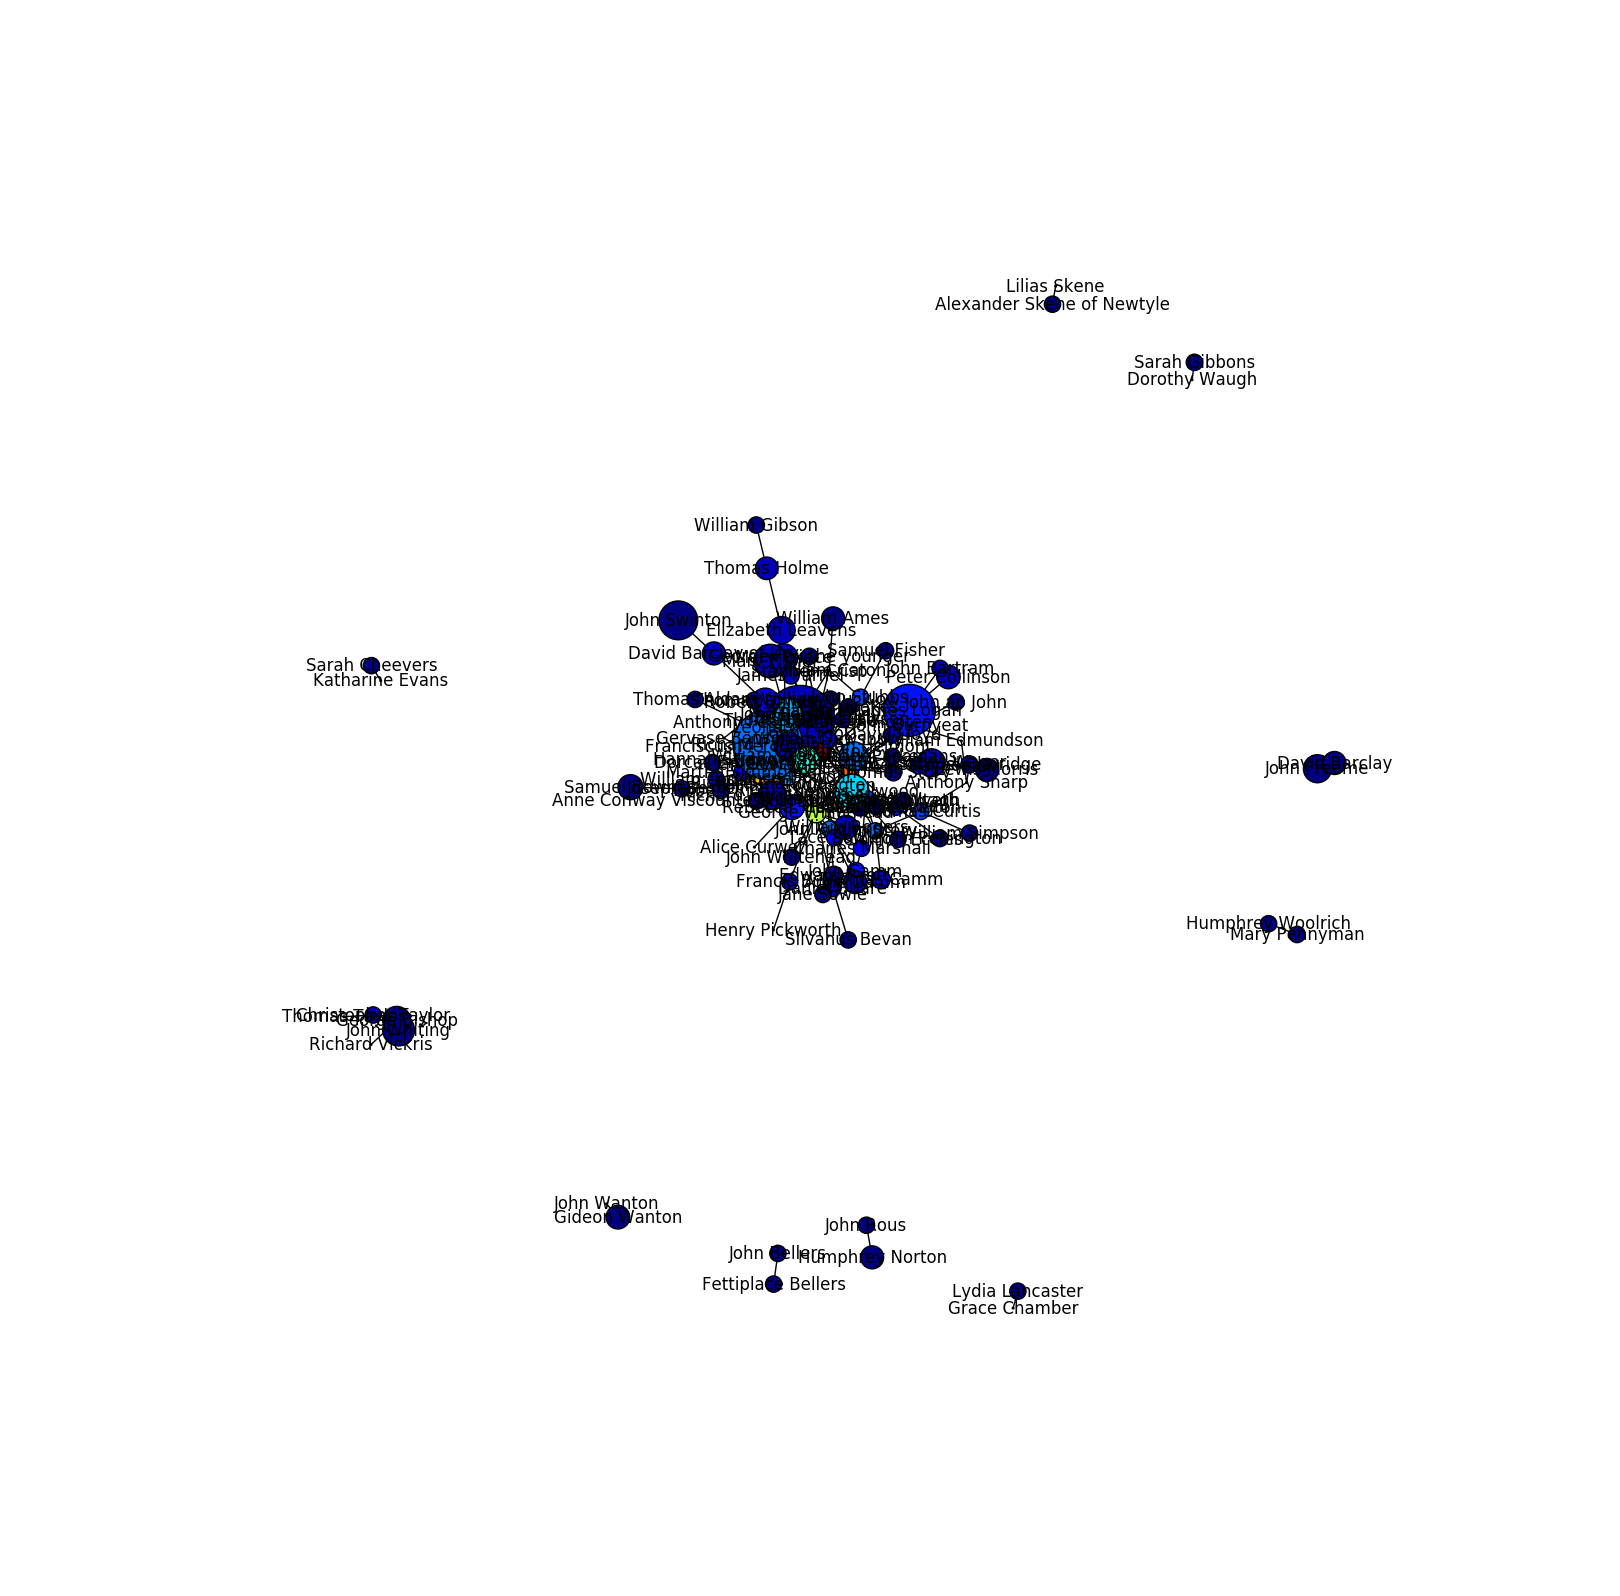

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

G_fb = G

#노드의 색깔은 degree의 정도이고 노드의 반지름은 중개 중심성 지수이다.
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.5, 1.5, -1.5, 1.5)

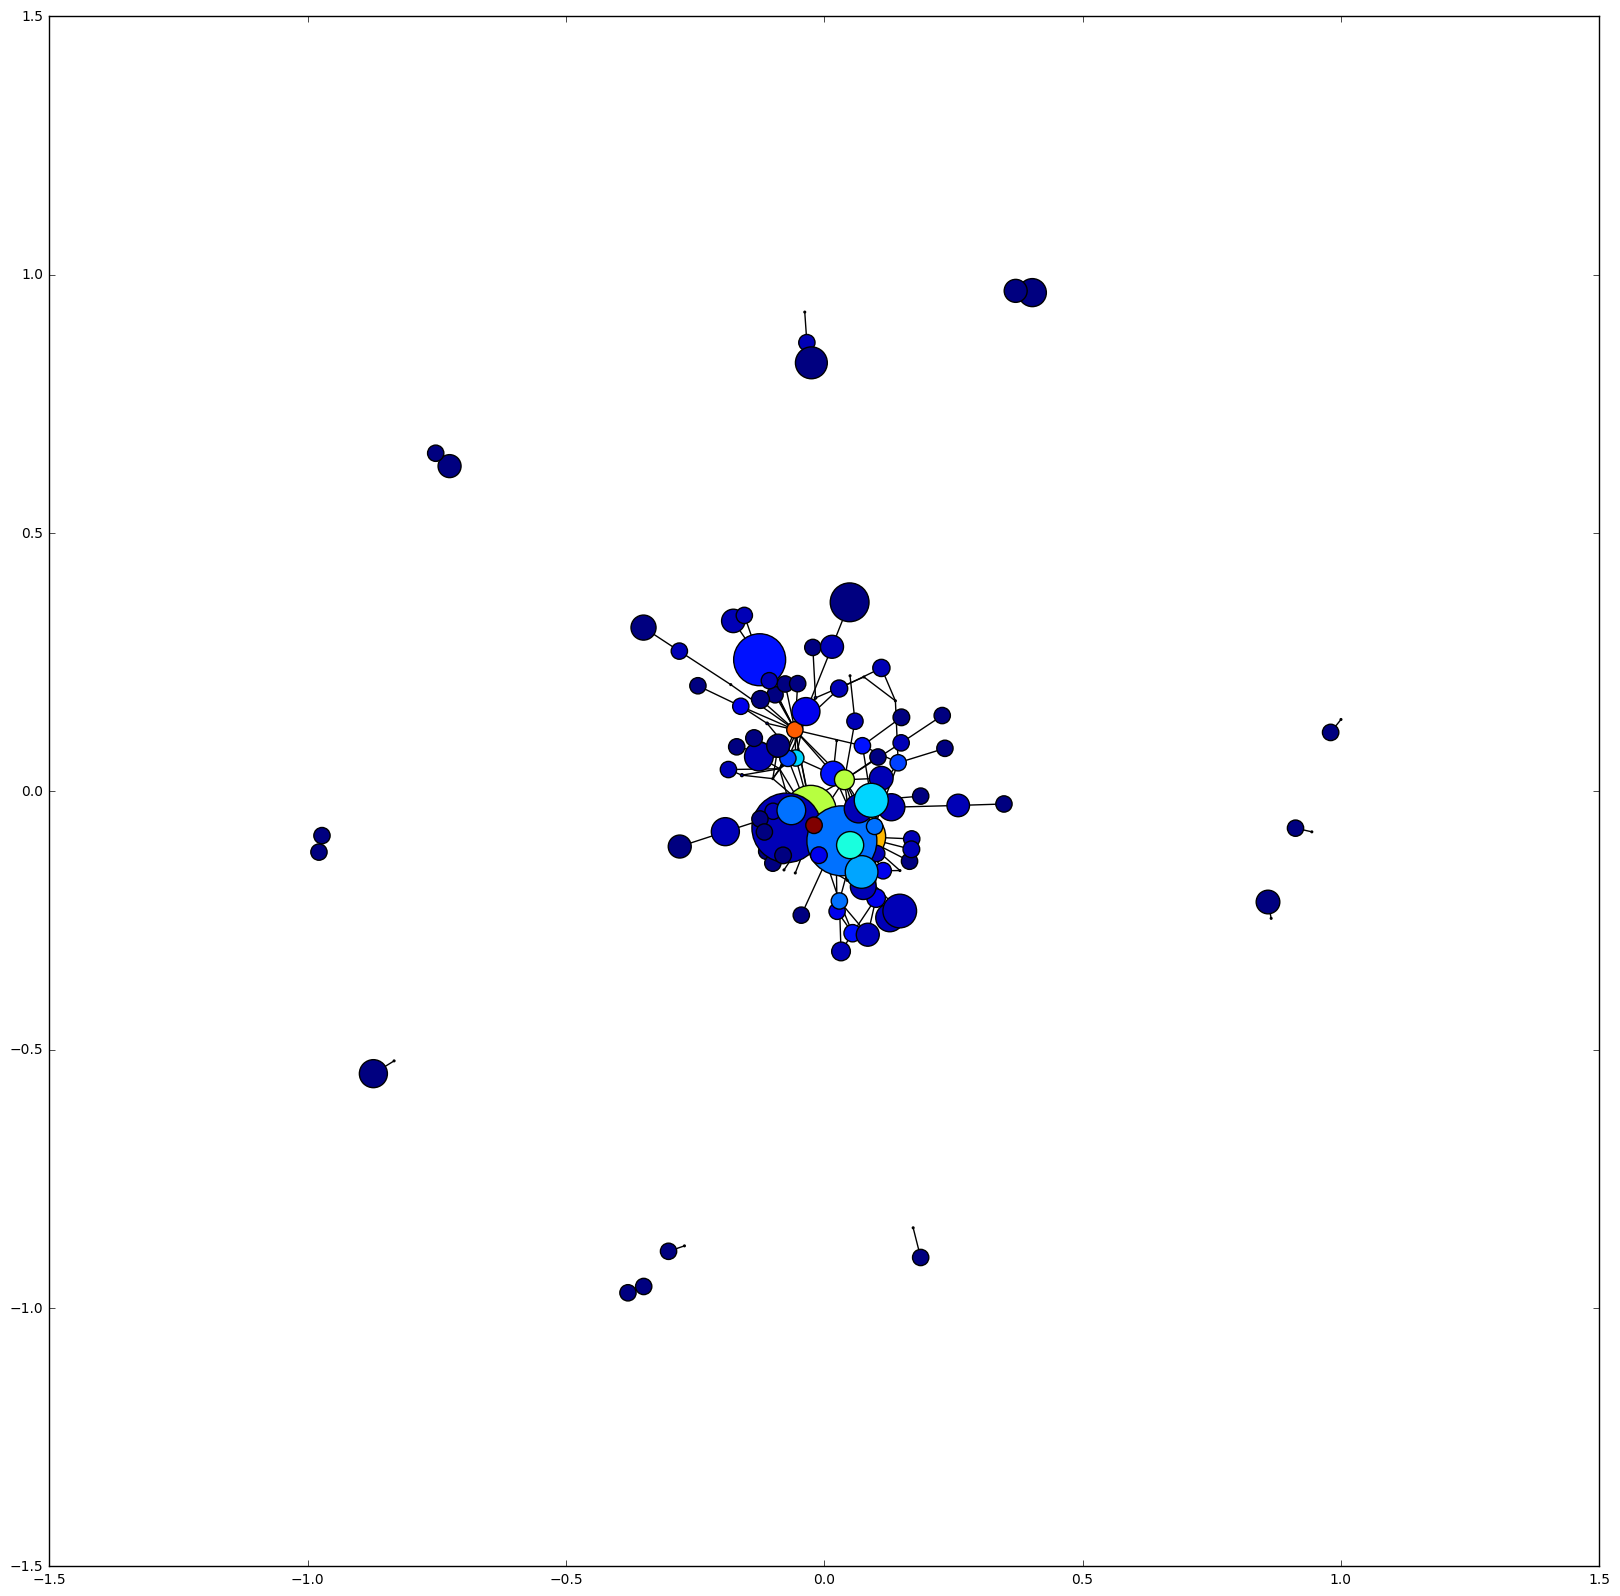

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

G_fb = G

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('on')

(-1.0, 1.5, -1.5, 1.0)

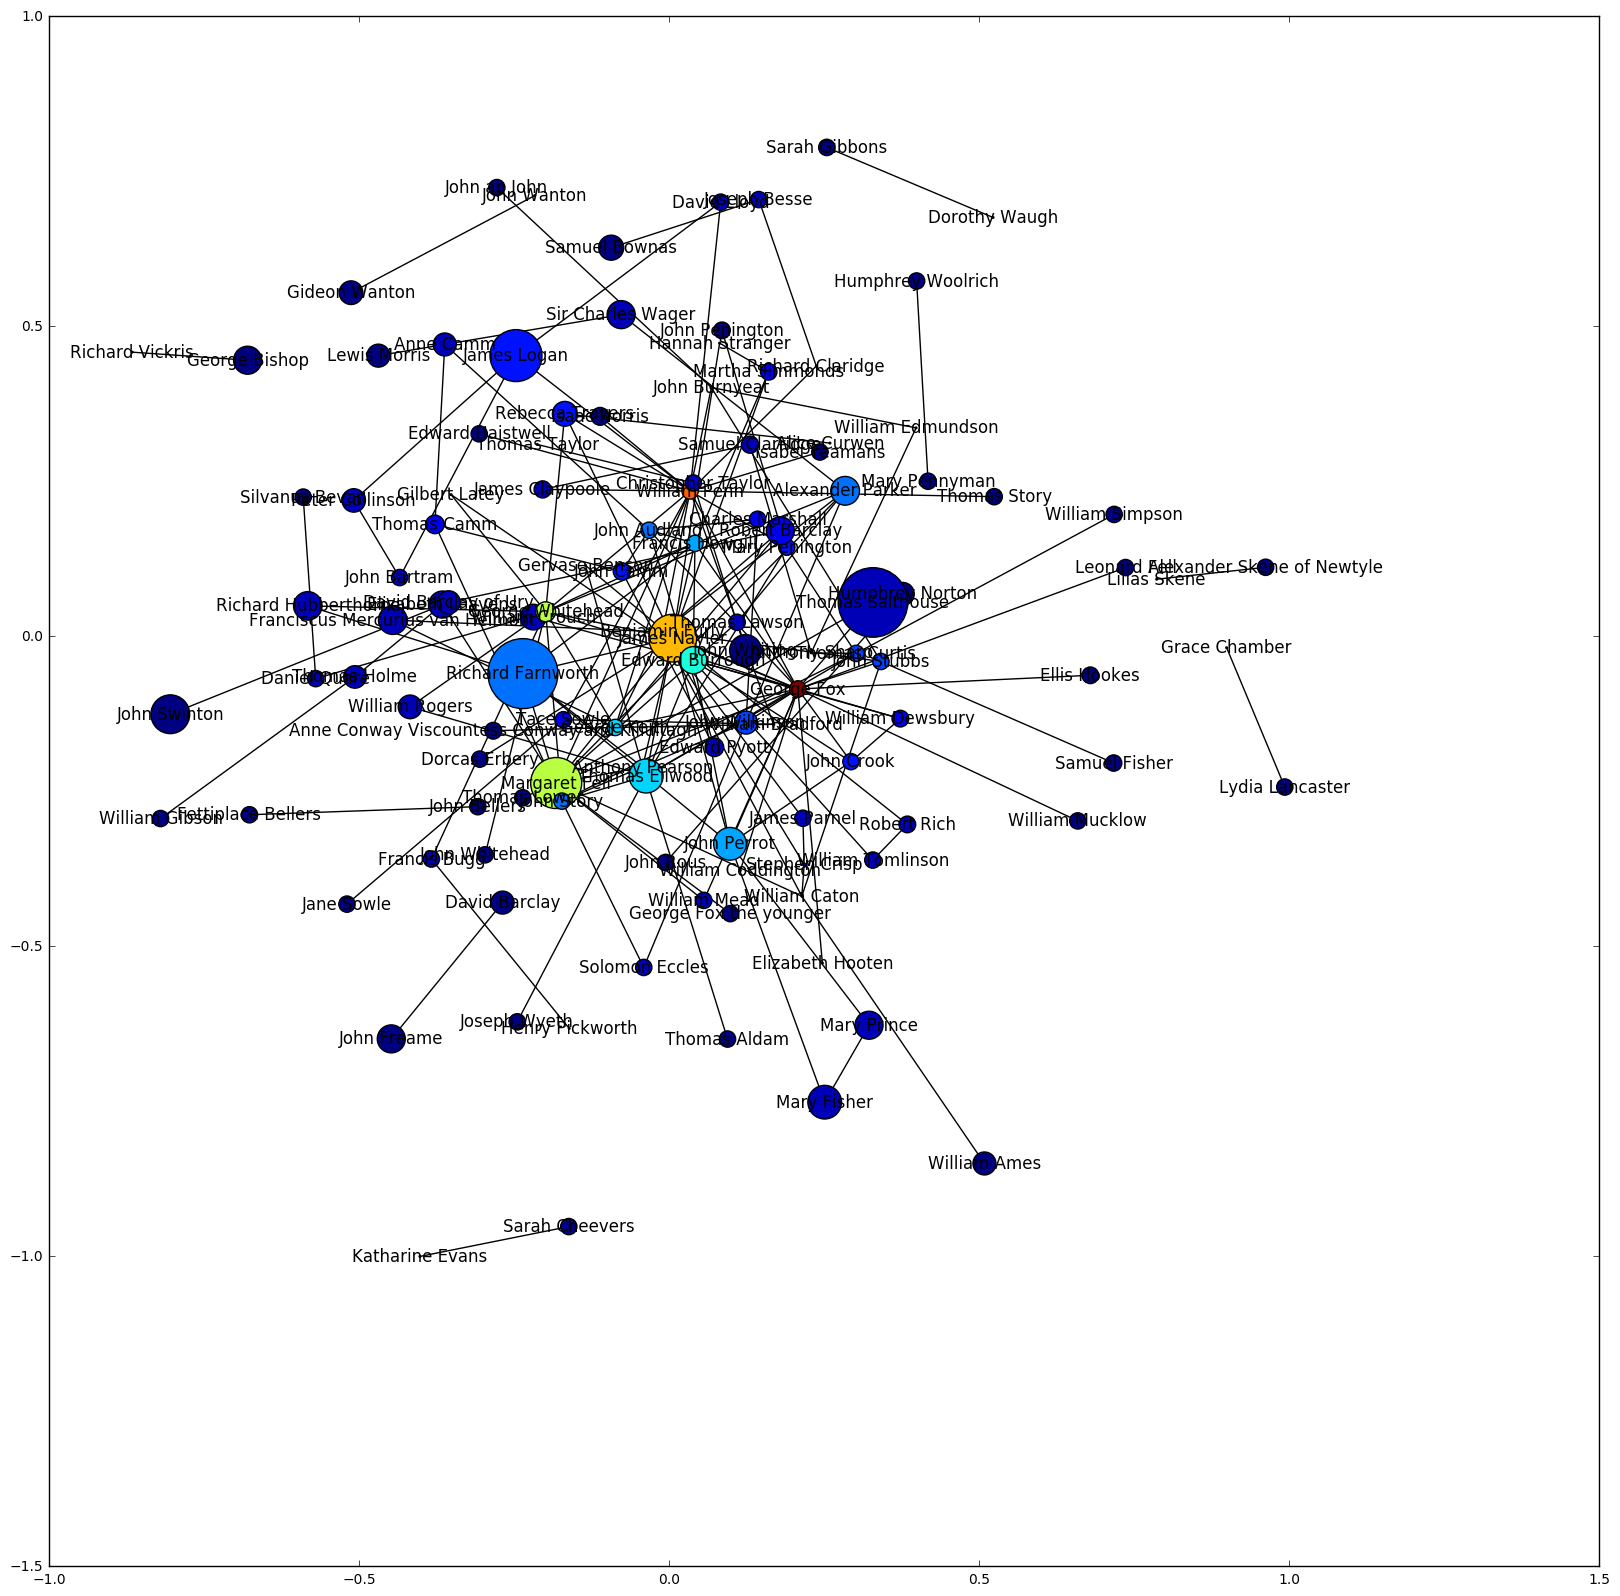

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

G_fb = G

pos = nx.spring_layout(G_fb , iterations = 5)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size , weight = 0.01)
plt.axis('on')